# Setup

In [40]:
import geopandas as gpd
import pandas as pd

from os.path import join
data_folder = '../../data/Arbres'

In [41]:
!pwd

/home/lab/Dropbox/simplon/Programmation/python/lps-data-science/module1


# Cartopy

In [42]:
# sphinx_gallery_thumbnail_number = 7
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

<AxesSubplot:>

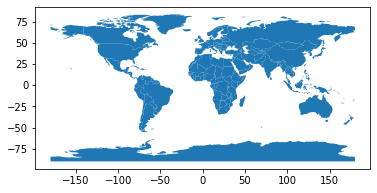

In [43]:
df.plot()

# Charger une geoDataFrame depuis un fichier

In [44]:
# data_dvf = gpd.read_file("http://api.cquest.org/dvf?lat=48.85&lon=2.43&dist=800")

In [45]:
#type(data_dvf)

In [46]:
#data_dvf.plot()

In [47]:
#data_dvf.head()

In [48]:
#france = gpd.read_file("data/regions-20180101.shp")
#ax = france[france.nuts2=='FR10'].plot(figsize=(20,20), color='none', edgecolor='gainsboro')
#data_dvf.plot(color='lightgreen', ax = ax)

# Changer le système de projection

![img](../../img/geo-projections.png)

In [49]:
arbres = gpd.read_file(join(data_folder, 'les-arbres.geojson'))

In [50]:
arbres.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
arbres_32630 = arbres.to_crs(epsg=32630)

# Carte interactive avec folium

https://python-visualization.github.io/folium/

In [52]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## Carte simple

In [53]:
montreuil_loc = [48.86,2.42]
mairie20_loc = [48.86533, 2.39957]
mairie2_loc = [48.86679, 2.34028]

In [54]:
# Create a map
m = folium.Map(location=mairie2_loc, tiles='openstreetmap', zoom_start=16)

# Display the map
m

## Points simples

In [55]:
if not 'arbres' in vars():
    arbres = gpd.read_file(join(data_folder,'les-arbres.geojson'))

arbres.head(5)

libellefrancais idemplacement domanialite  circonferenceencm  hauteurenm  \
0         Tilleul     000901015  Alignement                 60           8   
1         Platane     001202003  Alignement                105          15   
2         Sophora     001002004  Alignement                100           8   
3         Platane     001701002  Alignement                 55          10   
4         Platane     000303005  Alignement                 45           8   

        espece                  adresse   arrondissement stadedeveloppement  \
0      cordata          AVENUE GAMBETTA  PARIS 20E ARRDT                 JA   
1  x hispanica          AVENUE DU MAINE  PARIS 14E ARRDT                 JA   
2     japonica  PLACE CHARLES DE GAULLE   PARIS 8E ARRDT                  A   
3  x hispanica       AVENUE VICTOR HUGO  PARIS 16E ARRDT                 JA   
4  x hispanica    AVENUE JOSEPH BOUVARD   PARIS 7E ARRDT                  J   

  remarquable  idbase     genre complementadresse typeemplacement  \
0         NON  249408     Tilia                71           Arbre   
1         NON  255738  Platanus               102           Arbre   
2         NON  264004   Sophora              None           Arbre   
3         NON  265113  Platanus              None           Arbre   
4         NON  277141  Platanus              None           Arbre   

  varieteoucultivar                  geometry  
0              None  POINT (2.39688 48.86502)  
1              None  POINT (2.32294 48.83713)  
2              None  POINT (2.29626 48.87404)  
3              None  POINT (2.27554 48.86545)  
4              None  POINT (2.29898 48.85707)

In [56]:
arbres2 = arbres[arbres.arrondissement == 'PARIS 2E ARRDT'].reset_index()
arbres2['Latitude'] = arbres2.geometry.y
arbres2['Longitude'] = arbres2.geometry.x
arbres2.head()

index libellefrancais idemplacement domanialite  circonferenceencm  \
0    326           Chêne     000501002  Alignement                 54   
1    458     Micocoulier     000701004  Alignement                 20   
2    937      Pterocarya     000101015  Alignement                 48   
3   2612         Platane     000301001  Alignement                145   
4   2633           Chêne     000501004  Alignement                 65   

   hauteurenm        espece                 adresse  arrondissement  \
0           8         rubra          RUE DE TURBIGO  PARIS 2E ARRDT   
1           5     australis  BOULEVARD DES ITALIENS  PARIS 2E ARRDT   
2           6  fraxinifolia  BOULEVARD DES ITALIENS  PARIS 2E ARRDT   
3          13   x hispanica   BOULEVARD SAINT DENIS  PARIS 2E ARRDT   
4           7         rubra          RUE DE TURBIGO  PARIS 2E ARRDT   

  stadedeveloppement remarquable  idbase       genre complementadresse  \
0                  A         NON  229823     Quercus                15   
1               None         NON  275100      Celtis                17   
2                 JA         NON  274984  Pterocarya                 9   
3                  A         NON  274894    Platanus                11   
4                  A         NON  229825     Quercus                19   

  typeemplacement varieteoucultivar                  geometry   Latitude  \
0           Arbre              None  POINT (2.34949 48.86402)  48.864021   
1           Arbre              None  POINT (2.33666 48.87131)  48.871307   
2           Arbre              None  POINT (2.33850 48.87162)  48.871624   
3           Arbre              None  POINT (2.35401 48.86929)  48.869286   
4           Arbre              None  POINT (2.34980 48.86409)  48.864090   

   Longitude  
0   2.349487  
1   2.336657  
2   2.338501  
3   2.354014  
4   2.349796

In [57]:
# Create a map
m = folium.Map(location=mairie2_loc, tiles='cartodbpositron', zoom_start=16)

points = folium.features.GeoJson(arbres2)
m.add_child(points)

# Display the map
m

## Markers

In [58]:
# Create a map
m = folium.Map(location=mairie2_loc, tiles='openstreetmap', zoom_start=16)

# Add points to the map
for idx, row in arbres2.iterrows():
    lbl = '{} {} {}'.format(row['libellefrancais'], row['hauteurenm'], row['circonferenceencm'])
    Marker([row['Latitude'], row['Longitude']], popup= lbl).add_to(m)

# Display the map
m

## Heatmaps

In [59]:
from folium.plugins import HeatMap

m = folium.Map(location = mairie2_loc, tiles='openstreetmap', zoom_start=16)

HeatMap(data=arbres2[['Latitude', 'Longitude']], radius=8).add_to(m)

m

## Choropleth

In [60]:
plot_dict = pd.DataFrame(arbres2.adresse.value_counts()).reset_index()

In [61]:
rues = gpd.read_file(join(data_folder,'denominations-emprises-voies-actuelles/denominations-emprises-voies-actuelles.shp'))

rues = rues[rues.typo.isin(arbres2.adresse.unique())]

In [62]:
rue_arbres = rues.merge(plot_dict, left_on='typo', right_on='index')

In [63]:
rue_arbres.head()

id cvoie  cdgi                     typo                  typo_min  \
0  11600  4993  5127      RUE DE LA JUSSIENNE       rue de la Jussienne   
1  13413  8525  8894  BOULEVARD DE SEBASTOPOL  boulevard de SÃ©bastopol   
2   9146  0607  0622           RUE BACHAUMONT            rue Bachaumont   
3  10409  3087  3055             RUE DUSSOUBS              rue Dussoubs   
4  12122  6045  6124           RUE MARSOLLIER            rue Marsollier   

   date_arret siecle         statut    typvoie prevoie  ...  \
0        None      0  voie publique        rue   de la  ...   
1  1855-09-25     19  voie publique  boulevard      de  ...   
2  1900-12-07     19  voie publique        rue    None  ...   
3  1881-05-09     19  voie publique        rue    None  ...   
4  1829-01-01     19  voie publique        rue    None  ...   

                                          alignement servitude  \
0                                               None      None   
1                                               None      None   
2                                               None      None   
3                                               None      None   
4  Non retenus au POS et non repris au PLU : Ordo...      None   

                                          historique  \
0  Elle s'est appelÃ©e : rue Sainte-Marie l'Egypt...   
1  PrÃ©cÃ©demment boulevard du Centre et partie d...   
2  Ouverte par M. Ben AÃ¯ad sur l'emplacement du ...   
3  PrÃ©cÃ©demment, rue des Deux Portes Saint-Sauv...   
4                                               None   

                                          classement  \
0                                               None   
1                                               None   
2  Classement, alignements (non retenus au POS et...   
3                                               None   
4                                               None   

                 numerotage  \
0  ArrÃªtÃ© du 9 juin 1881.   
1                      None   
2                      None   
3                      None   
4                      None   

                                                orig  \
0  Jussienne, altÃ©ration d'Egyptienne ; il y ava...   
1  Port de guerre de CrimÃ©e pris par l'armÃ©e an...   
2  Louis Petit de Bachaumont (1690-1771), littÃ©r...   
3  Denis Gaston Dussoubs, tuÃ© le 4 dÃ©cembre 185...   
4  BenoÃ®t Joseph Marsollier des VivetiÃ¨res (175...   

                                           ouverture  \
0                                               None   
1  DÃ©cret du 29 septembre 1854 (UP). DÃ©cret du ...   
2                                   Ouverte en 1899.   
3          DÃ©cret du 9 juillet 1909 (UP), partie C.   
4  Ordonnance du 8 octobre 1826, sauf au droit de...   

                                            geometry                    index  \
0  POLYGON ((2.34467 48.86559, 2.34470 48.86551, ...      RUE DE LA JUSSIENNE   
1  MULTIPOLYGON (((2.35253 48.86624, 2.35235 48.8...  BOULEVARD DE SEBASTOPOL   
2  MULTIPOLYGON (((2.34607 48.86603, 2.34607 48.8...           RUE BACHAUMONT   
3  MULTIPOLYGON (((2.34939 48.86679, 2.34939 48.8...             RUE DUSSOUBS   
4  POLYGON ((2.33501 48.86825, 2.33510 48.86817, ...           RUE MARSOLLIER   

  adresse  
0       1  
1      49  
2      12  
3      11  
4      12  

[5 rows x 30 columns]

In [64]:
rue_arbres['arbes_m2'] = rue_arbres.adresse / rue_arbres.geometry.area

<ipython-input-64-f3a7a677ba96>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rue_arbres['arbes_m2'] = rue_arbres.adresse / rue_arbres.geometry.area


In [65]:
rue_arbres.index = rue_arbres.index.astype(str) # Fonctionne uniquement avec des id qui sont des str...

In [66]:
rues4326 = rue_arbres.to_crs(epsg=4326) # requis pour folium.choropleth?

In [67]:
# Create a map
m = folium.Map(location=mairie2_loc, tiles='cartodbpositron', zoom_start=15)


# Add the chloropleth
choropleth = Choropleth(
    name='densité arbres',
   geo_data=rue_arbres, # geoJSON file
   data=rue_arbres['arbes_m2'], # Pandas dataframe
    key_on="feature.id", # ou bien feature.properties.XXX (le nom de la col dans data) : https://www.nagarajbhat.com/post/folium-visualization/
   fill_color='Greens', # colormap
    highlight=True,
   legend_name='densite arbres'
).add_to(m)

# add label
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['typo', 'adresse'],labels=False) # adresse + nb arbres
)

folium.LayerControl(collapsed=True).add_to(m)

m.save('./arbres2.html')
# Display the map
m

# Geocoder des lieux

In [68]:
from geopandas.tools import geocode

In [69]:
result = geocode('Mairie du 2e, paris', provider="nominatim", user_agent="ml-learning")
result

geometry                                            address
0  POINT (2.34028 48.86679)  Mairie du 2e, Rue de la Banque, 2e Arrondissem...

In [70]:
point = result.geometry.iloc[0]
print("Latitude:", point.y)
print("Longitude:", point.x)

Latitude: 48.8667872
Longitude: 2.3402765


# Calcul de distances

In [71]:
if not 'arbres' in vars():
    arbres = gpd.read_file(join(data_folder,'les-arbres.geojson'))

In [72]:
geant_circ = arbres.iloc[arbres.circonferenceencm.idxmax()]
geant_haut = arbres.iloc[arbres.hauteurenm.idxmax()]

import pandas as pd
df = pd.DataFrame([geant_circ, geant_haut]).reset_index()
df

index libellefrancais idemplacement domanialite  circonferenceencm  \
0  104387         Platane     000101026  Alignement             250255   
1   39826         Tilleul     000301046  Alignement                125   

   hauteurenm       espece               adresse     arrondissement  \
0          22  x hispanica  PLACE DE LA CHAPELLE    PARIS 18E ARRDT   
1      881818    tomentosa  ROUTE DE LA PYRAMIDE  BOIS DE VINCENNES   

  stadedeveloppement remarquable   idbase     genre complementadresse  \
0                  A         NON   272885  Platanus              None   
1                  J         NON  2003429     Tilia              None   

  typeemplacement varieteoucultivar                             geometry  
0           Arbre              None   POINT (2.3602290672 48.8848366311)  
1           Arbre              None  POINT (2.45800975821 48.8235139054)

In [73]:
# Create a map
m = folium.Map(location=mairie2_loc, tiles='openstreetmap', zoom_start=13)

for idx, row in df.iterrows():
    lbl = '{} {} {}'.format(row['libellefrancais'], row['hauteurenm'], row['circonferenceencm'])
    Marker([row.geometry.y, row.geometry.x], popup= lbl).add_to(m)
m

# Saisir une coordonnée au click

In [74]:
m = folium.Map(location=mairie2_loc, tiles='openstreetmap', zoom_start=13)

folium.LatLngPopup().add_to(m)

m

# Sandbox

In [75]:
data_dvf = gpd.read_file("http://api.cquest.org/dvf?lat=48.85&lon=2.43&dist=800")
data_dvf.head()

numero_disposition date_mutation nature_mutation  valeur_fonciere  \
0             000001    2018-05-22           Vente         197000.0   
1             000001    2014-03-28           Vente         430000.0   
2             000001    2014-12-09           Vente         179554.0   
3             000001    2015-08-04           Vente         159000.0   
4             000001    2017-08-31           Vente         103000.0   

  numero_voie type_voie code_voie                 voie code_postal  \
0          34       RUE      8535  DU SERGENT GODEFROY       93100   
1          27       RUE      8190     DE LA REVOLUTION       93100   
2          59       RUE      2595         DOUY DELCUPE       93100   
3          59       RUE      2595         DOUY DELCUPE       93100   
4          59       RUE      2595         DOUY DELCUPE       93100   

               commune  ... nature_culture surface_terrain surface_lot_3  \
0            MONTREUIL  ...           None             NaN           NaN   
1  MONTREUIL SOUS BOIS  ...           None             NaN           NaN   
2  MONTREUIL SOUS BOIS  ...           None             NaN           NaN   
3  MONTREUIL SOUS BOIS  ...           None             NaN           NaN   
4            MONTREUIL  ...           None             NaN           NaN   

  lot_4 lot_5  numero_volume surface_lot_4 surface_lot_51  \
0  None  None           None           NaN            NaN   
1  None  None           None           NaN            NaN   
2  None  None           None           NaN            NaN   
3  None  None           None           NaN            NaN   
4  None  None           None           NaN            NaN   

  nature_culture_speciale                  geometry  
0                    None  POINT (2.42964 48.85468)  
1                    None  POINT (2.42917 48.85492)  
2                    None  POINT (2.43065 48.85556)  
3                    None  POINT (2.43065 48.85556)  
4                    None  POINT (2.43065 48.85556)  

[5 rows x 38 columns]

In [76]:
data_dvf_sel = data_dvf[data_dvf.commune=='MONTREUIL']
dvf_gjson = data_dvf_sel.to_crs(epsg='4326').to_json()

In [77]:
sections_93 = gpd.read_file(join(data_folder,'cadastre-93-sections-shp')
sm = sections_93[sections_93.commune == '93048']
sm.set_index('code', inplace=True)

data_dvf = gpd.read_file("http://api.cquest.org/dvf?code_commune=93048")
plot_dict = data_dvf.section.value_counts()

SyntaxError: invalid syntax (<ipython-input-77-effd8130a5f2>, line 2)

# Liens

https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8 : make a gif from a map


https://github.com/etalab/DVF-app : explorer les donner de demandes de valeur foncière

https://makina-corpus.com/blog/metier/2019/python-carto

https://opendata.paris.fr/

https://www.data.gouv.fr/fr/datasets/admin-express/ : les fond de cartes

https://python-visualization.github.io/folium/modules.html?highlight=choropleth#folium.features.Choropleth

# Tutos

https://python-graph-gallery.com/292-choropleth-map-with-folium/

https://www.nagarajbhat.com/post/folium-visualization/
